In [50]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sms
import re
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

In [51]:
df = pd.read_csv("car_price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [53]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [54]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [55]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [56]:
help(re.findall)

Help on function findall in module re:

findall(pattern, string, flags=0)
    Return a list of all non-overlapping matches in the string.
    
    If one or more capturing groups are present in the pattern, return
    a list of groups; this will be a list of tuples if the pattern
    has more than one group.
    
    Empty matches are included in the result.



In [57]:
#re comp
p= re.compile(r"\w+-?\w+")
df["car_company"] = df["CarName"].apply(lambda x:re.findall(p,x)[0])

In [58]:
df["car_company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [59]:
df["symboling"]= df["symboling"].astype("object")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [60]:
df["car_company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [61]:
df.loc[(df["car_company"]=="vokswagen")|
   (df["car_company"]=="vw"), "car_company"] ="volkswagen"

In [62]:
df.loc[df["car_company"]=="porcshce", "car_company"] = 'porsche'


In [63]:
df.loc[df["car_company"]=="toyouta", "car_company"] ="toyouta"

In [64]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_company'],
      dtype='object')

In [65]:
df.drop("CarName", axis =1, inplace = True)

In [66]:
# Create the figure and two subplots
columns_to_plot=[]
for col in df.columns:
        if df[col].dtype!='O':
            columns_to_plot.append(col)
columns_to_plot

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

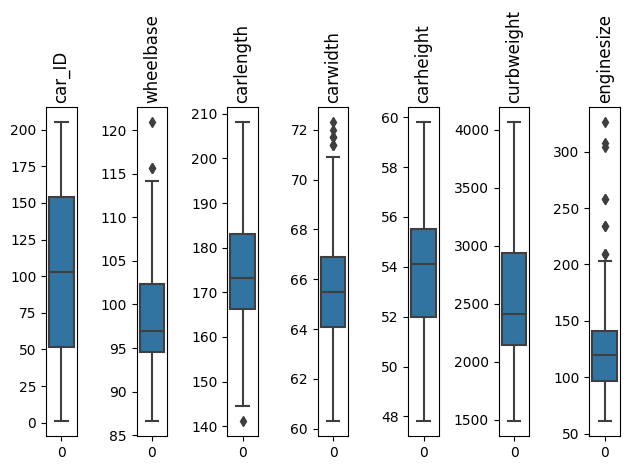

In [67]:
fig, axes = plt.subplots(ncols = len(columns_to_plot[:7]))
for column, axis in zip(columns_to_plot[:7], axes):
    sns.boxplot(data = df[column], ax = axis)
    axis.set_title(column, rotation =90)
plt.tight_layout()
plt.show()
    

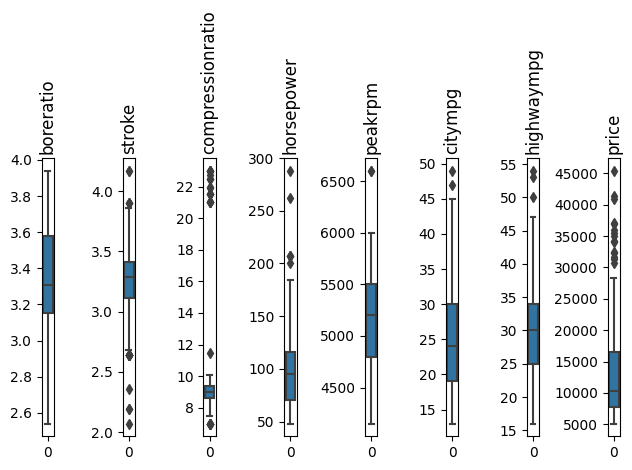

In [68]:
fig, axes = plt.subplots(ncols = len(columns_to_plot[7:]))
for column, axis in zip(columns_to_plot[7:], axes):
    sns.boxplot(data = df[column], ax = axis)
    axis.set_title(column, rotation =90)
plt.tight_layout()
plt.show()

In [69]:
df.corr()["price"]

C:\Users\railm\AppData\Local\Temp\ipykernel_21728\2819534833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"]


car_ID             -0.109093
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [70]:
#define response variable
y = df['price']

#define explanatory variable
x = df['enginesize']

#add constant to predictor variables
x = sms.add_constant(x)

#fit linear regression model
model = sms.OLS(y, x).fit() 

In [71]:
#create instance of influence
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([1.47693585e-05, 1.19765850e-03, 2.16248508e-04, 2.61411765e-03,
       1.19729627e-03, 3.43291991e-05, 1.44391278e-03, 2.89523883e-03,
       1.61525562e-02, 2.49567161e-03, 7.87625263e-03, 9.15750429e-03,
       6.39820651e-04, 7.62481902e-04, 7.57470301e-03, 1.14657986e-02,
       1.69074978e-01, 8.03194349e-02, 5.02878544e-03, 1.84353623e-04,
       7.70882416e-05, 6.74234641e-04, 1.48173370e-04, 5.40925778e-05,
       2.16342156e-04, 4.59038613e-05, 7.98739065e-05, 4.04053910e-06,
       2.06059698e-03, 6.57185142e-03, 2.49158581e-04, 9.01803731e-05,
       9.38592984e-06, 2.23458590e-04, 2.41455641e-05, 4.56908443e-06,
       4.56908443e-06, 1.23255746e-03, 3.44584811e-04, 4.84432594e-04,
       4.07310637e-06, 1.19150915e-03, 1.76578144e-06, 2.73394651e-03,
       9.82242854e-04, 9.82242854e-04, 1.37515677e-04, 1.78758158e-02,
       1.64997254e-04, 5.63596143e-01, 1.21614777e-03, 3.85659457e-04,
       6.06637705e-05, 8.98985292e-05, 5.60759288e-06, 2.48117869e-02,
     

In [72]:
cooks_d = influence.cooks_distance[0]

# get the indexes of data points with high Cook's distance
threshold = 4/(len(x)-2) 
high_cooks_d = np.where(cooks_d > threshold)[0]
print(high_cooks_d)

[ 16  17  49  55  56  57  58  70  73  74 101 102 103 126 127 128 129]


In [73]:
def outlier_detection(df, col):
    fqr = df[col].quantile(0.25)
    tqr = df[col].quantile(0.75)
    iqr = tqr-fqr
    df = df[(df[col]<(fqr-1.5*iqr))|(df[col]>(tqr+1.5*iqr))]
    return df

In [74]:
df_out = outlier_detection(df, "enginesize")
df_out

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
15,16,0,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,17,0,gas,std,two,sedan,rwd,front,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,18,0,gas,std,four,sedan,rwd,front,110.0,197.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
47,48,0,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,49,0,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,50,0,gas,std,two,sedan,rwd,front,102.0,191.7,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
71,72,-1,gas,std,four,sedan,rwd,front,115.6,202.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,73,3,gas,std,two,convertible,rwd,front,96.6,180.3,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,74,0,gas,std,four,sedan,rwd,front,120.9,208.1,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick
74,75,1,gas,std,two,hardtop,rwd,front,112.0,199.2,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick


In [75]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [76]:
# split into X and y
X = df.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y = df['price']

In [77]:
# creating dummy variables for categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [78]:
cars_categorical = X.select_dtypes(include = "object")
cars_categorical

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,-1,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,-1,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [79]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

C:\Users\railm\AppData\Local\Temp\ipykernel_21728\2986971395.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)


,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [81]:
# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [82]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,-0.238120
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,-0.238120
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,-0.238120
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,-0.238120
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,-0.238120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,4.199567
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,4.199567
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,4.199567
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,...,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.249351,4.199567


In [83]:
# number of features
len(X_train.columns)

71

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [85]:
r2 = r2_score(y_test, y_pred)
r2

-9.04066169253807e+24

In [86]:
mse = mean_squared_error(y_test, y_pred)
mse

2.8665379693732057e+32

In [87]:
np.sqrt(mse)

1.6930853402511066e+16

In [88]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 40))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [89]:
y_pred_cv = model_cv.predict(X_test)
r2_test = r2_score(y_test, y_pred_cv)

In [90]:
r2_test

0.8649964174342194

In [91]:
y_pred_cv.min()

-182.6336483301311

In [92]:
y_pred_cv.max()

35422.30433380932

In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred_cv)
np.sqrt(mse)

2068.956630558658

In [94]:
y_pred_cv_train = model_cv.predict(X_train)
r2_tr = r2_score(y_train, y_pred_cv_train)
r2_tr

0.9436927257769502

In [95]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse1 = mean_squared_error(y_train, y_pred_cv_train)
np.sqrt(mse1)

2053.884925597339

In [96]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124124,0.011575,0.003534,0.006116,2,{'n_features_to_select': 2},0.712322,0.673284,0.839691,0.643727,...,0.619203,0.207193,38,0.693638,0.809346,0.768171,0.798515,0.813980,0.776730,0.044505
1,0.145192,0.032344,0.000000,0.000000,3,{'n_features_to_select': 3},0.817568,0.720574,0.864579,0.675851,...,0.666140,0.217610,37,0.796890,0.868796,0.833999,0.850420,0.841934,0.838408,0.023763


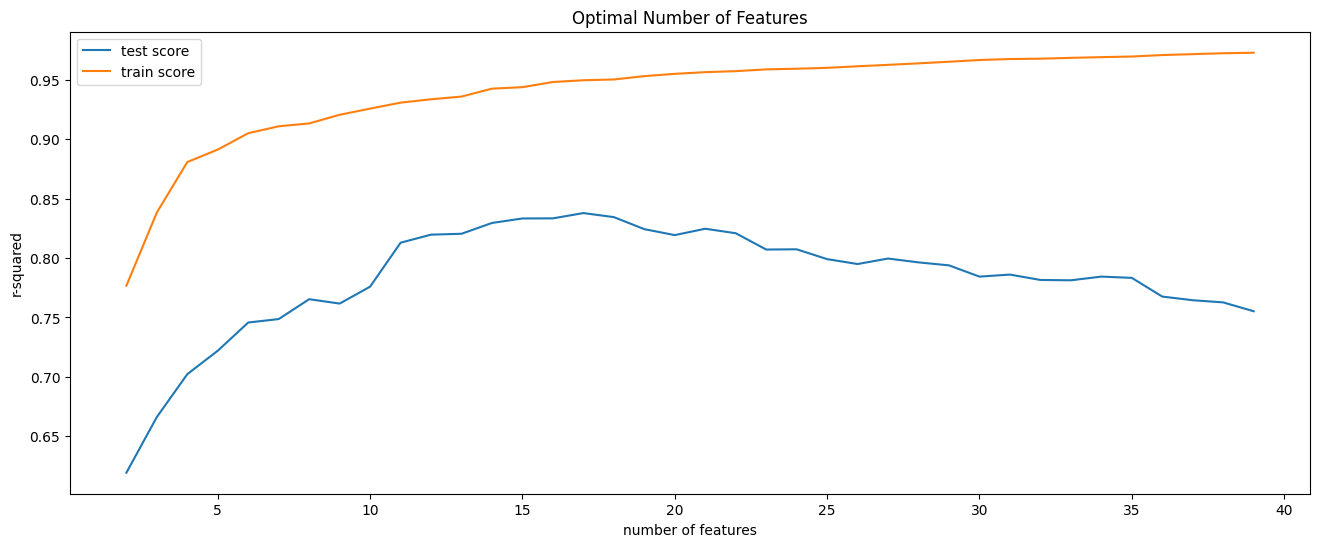

In [97]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')